Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 5
----------

# MNIST Digit Recognition with Convolutional Neural Networks
--------

### Objectives:
1. Study the MNIST dataset.
2. Study the concepts of Convolutional Neural Networks (CNN).
3. Implement the MNIST digit recognition with CNN.

### Theory:

<b>MNIST Dataset</b>: The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images of digits from 0 to 9, each image being 28x28 pixels in grayscale.

<b>Convolutional Neural Networks (CNN)</b>: CNNs are a class of deep neural networks designed to process and analyze visual data. They are particularly effective for image classification tasks due to their ability to capture spatial hierarchies in images. The key components of CNNs include:
- Convolutional Layers: Apply filters to the input image to detect features such as edges, textures, and patterns.
- Activation Functions: Introduce non-linearity to the network, allowing it to learn complex patterns.
- Pooling Layers: Reduce the spatial dimensions of the input, which helps in lowering computational costs and preventing overfitting.
- Fully Connected Layers: Connect every neuron in one layer to every neuron in the next layer, enabling high-level reasoning.
- Dropout: A regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.

### Code:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Add a channel dimension (1 for grayscale)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [5]:
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Output layer with 10 units for 10 classes
])

In [6]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_split=0.1, # Use 10% of the training data for validation
                    batch_size=64)

Epoch 1/5
844/844 [==============================] - 38s 44ms/step - loss: 0.2017 - accuracy: 0.9398 - val_loss: 0.0525 - val_accuracy: 0.9843
Epoch 2/5
844/844 [==============================] - 36s 43ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 3/5
844/844 [==============================] - 37s 44ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0376 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 37s 44ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 5/5
844/844 [==============================] - 37s 44ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0330 - val_accuracy: 0.9905


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.0273 - accuracy: 0.9912 - 2s/epoch - 6ms/step

Test accuracy: 0.9911999702453613


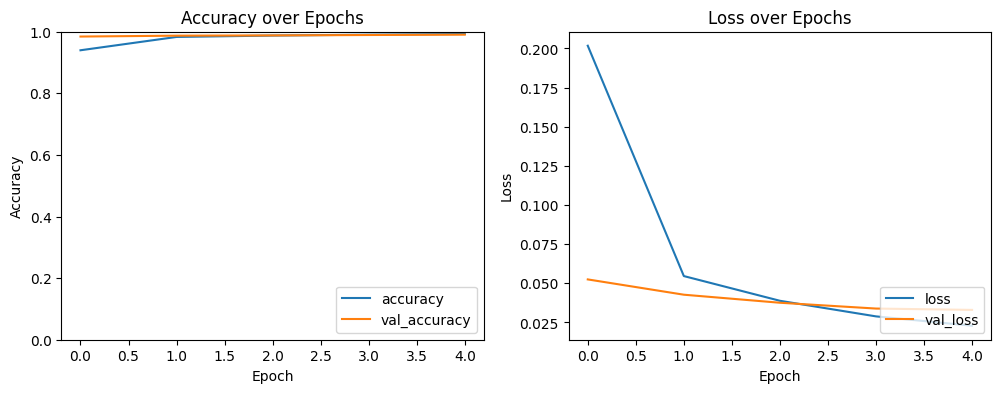

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Loss over Epochs')
plt.show()

### Conclusion:
The MNIST digit recognition experiment demonstrates the effectiveness of Convolutional Neural Networks in image classification tasks. By leveraging the hierarchical feature extraction capabilities of CNNs, we can achieve high test accuracy of 99.11% in recognizing handwritten digits.